In [1]:
from differences import ATTgt
from matplotlib import pyplot as plt
from analysis_utilities import aggregate_by_time_and_plot, aggregate_by_event_time_and_plot, \
    select_controls, test_balance, add_missing_indicators, prepare_df, generate_variable_names

plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300
import pandas as pd

# Store paths.
INPUT_DATA = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/data/03_cleaned/crime_analysis.csv"
OUTPUT_FIGURES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crime_90m/figures"
OUTPUT_TABLES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crime_90m/tables"


# Read restricted sample panel dataset into memory.
df = pd.read_csv(INPUT_DATA)

analysis='group_1_crimes_100m'

In [2]:
import numpy as np

value_vars_crime, month_to_int_dictionary, int_to_month_dictionary = generate_variable_names(analysis=analysis)

# Uncomment below line for "any crime" analysis
# df[value_vars_crime] = np.where(df[value_vars_crime] > 0, 1, 0)

In [3]:
covariates_exploration_df = select_controls(df=df, analysis=analysis, output_directory=OUTPUT_TABLES)
covariates_exploration_df

Dependent Variable  \
                                                                                             Assault-Related Crime Incidents Within 100m, Oct. 2022   
                                                 \emph{Independent Variable}                                                                          
Panel A: Pre-treatment Outcomes                  twenty_seventeen_group_1_crimes_100m                                              3.989421e-59       
                                                 pre_treatment_change_in_group_1_crimes_100m                                       5.052433e-11       
Panel B: Census Tract Characteristics            frac_coll_plus2010                                                                1.435494e-08       
                                                 job_density_2013                                                                  3.214119e-16       
                                                 med_hhinc2016                                                                     1.546286e-01       
                                                 poor_share2010                                                                    2.158790e-01       
                                                 popdensity2010                                                                    2.625103e-02       
                                                 share_white2010                                                                   4.286401e-04       
                                                 traveltime15_2010                                                                 4.629768e-11       
Panel C: Case Initiation                         for_cause                                                                         1.781184e-01       
                                                 no_cause                                                                          6.439990e-01       
                                                 non_payment                                                                       1.059603e-01       
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                                                          1.871784e-01       
                                                 hasAttyP                                                                          3.320580e-01       
                                                 isEntityD                                                                         2.561454e-02       
                                                 isEntityP                                                                         1.375726e-02       

                                                                                                                
                                                                                             Plaintiff Victory  
                                                 \emph{Independent Variable}                                    
Panel A: Pre-treatment Outcomes                  twenty_seventeen_group_1_crimes_100m             1.420419e-01  
                                                 pre_treatment_change_in_group_1_crimes_100m      2.974575e-01  
Panel B: Census Tract Characteristics            frac_coll_plus2010                               2.403331e-01  
                                                 job_density_2013                                 1.626836e-01  
                                                 med_hhinc2016                                    1.910501e-01  
                                                 poor_share2010                                   1.428679e-01  
                                                 popdensity2010                                   5.946111e-02  
                                                 share_white2010                                  9.829904e-02  
                

In [4]:
balance_table, pre_treatment_covariates = test_balance(df, analysis, covariates_exploration_df, OUTPUT_TABLES)
balance_table

\
                                                    Cases Won by Plaintiff   
Panel A twenty_seventeen_group_1_crimes_100m                      0.414481   
        pre_treatment_change_in_group_1_crimes_100m               0.036726   
Panel B frac_coll_plus2010                                        0.322882   
        job_density_2013                                      16069.137185   
        popdensity2010                                        23086.043553   
        share_white2010                                           0.312272   
        traveltime15_2010                                         0.162315   
Panel D isEntityD                                                 0.014166   
        isEntityP                                                 0.808499   

                                                    Difference in Cases Won by Defendant  \
                                                                              Unweighted   
Panel A twenty_seventeen_group_1_crimes_100m                                    0.062539   
        pre_treatment_change_in_group_1_crimes_100m                            -0.057934   
Panel B frac_coll_plus2010                                                      0.014179   
        job_density_2013                                                     3197.929971   
        popdensity2010                                                       1373.148087   
        share_white2010                                                         0.024618   
        traveltime15_2010                                                       0.005986   
Panel D isEntityD                                                              -0.039232   
        isEntityP                                                               0.099762   

                                                                               \
                                                         \emph{p}    Weighted   
Panel A twenty_seventeen_group_1_crimes_100m         1.420419e-01    0.005651   
        pre_treatment_change_in_group_1_crimes_100m  2.974575e-01   -0.029538   
Panel B frac_coll_plus2010                           2.403331e-01   -0.011943   
        job_density_2013                             1.626836e-01  585.048867   
        popdensity2010                               5.946111e-02 -683.869231   
        share_white2010                              9.829904e-02   -0.006390   
        traveltime15_2010                            2.271578e-01   -0.006544   
Panel D isEntityD                                    4.881644e-07   -0.019384   
        isEntityP                                    6.134468e-06    0.000503   

                                                               
                                                     \emph{p}  
Panel A twenty_seventeen_group_1_crimes_100m         0.892977  
        pre_treatment_change_in_group_1_crimes_100m  0.597291  
Panel B frac_coll_plus2010                           0.297050  
        job_density_2013                             0.796866  
        popdensity2010                               0.298730  
        share_white2010                              0.652457  
        traveltime15_2010                            0.153675  
Panel D isEntityD                                    0.007016  
        isEntityP                                    0.974323

In [5]:
# Store treatment date variable -- may be either file_date or latest_docket_date -- and drop rows where missing.
treatment_date_variable = 'file_date'
treatment_month_variable = treatment_date_variable.replace('date', 'month')

# Generate indicators for missing data.
missing_indicators = []

# Prepare df for use with the differences package.
df = prepare_df(df, analysis, treatment_date_variable, pre_treatment_covariates, missing_indicators, value_vars_crime, month_to_int_dictionary)

In [6]:
# Run DiD without conditioning on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
result = att_gt.fit(formula=analysis, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]  100%|████████████████████| 2184/2184 [00:14<00:00, 155.56it/s]


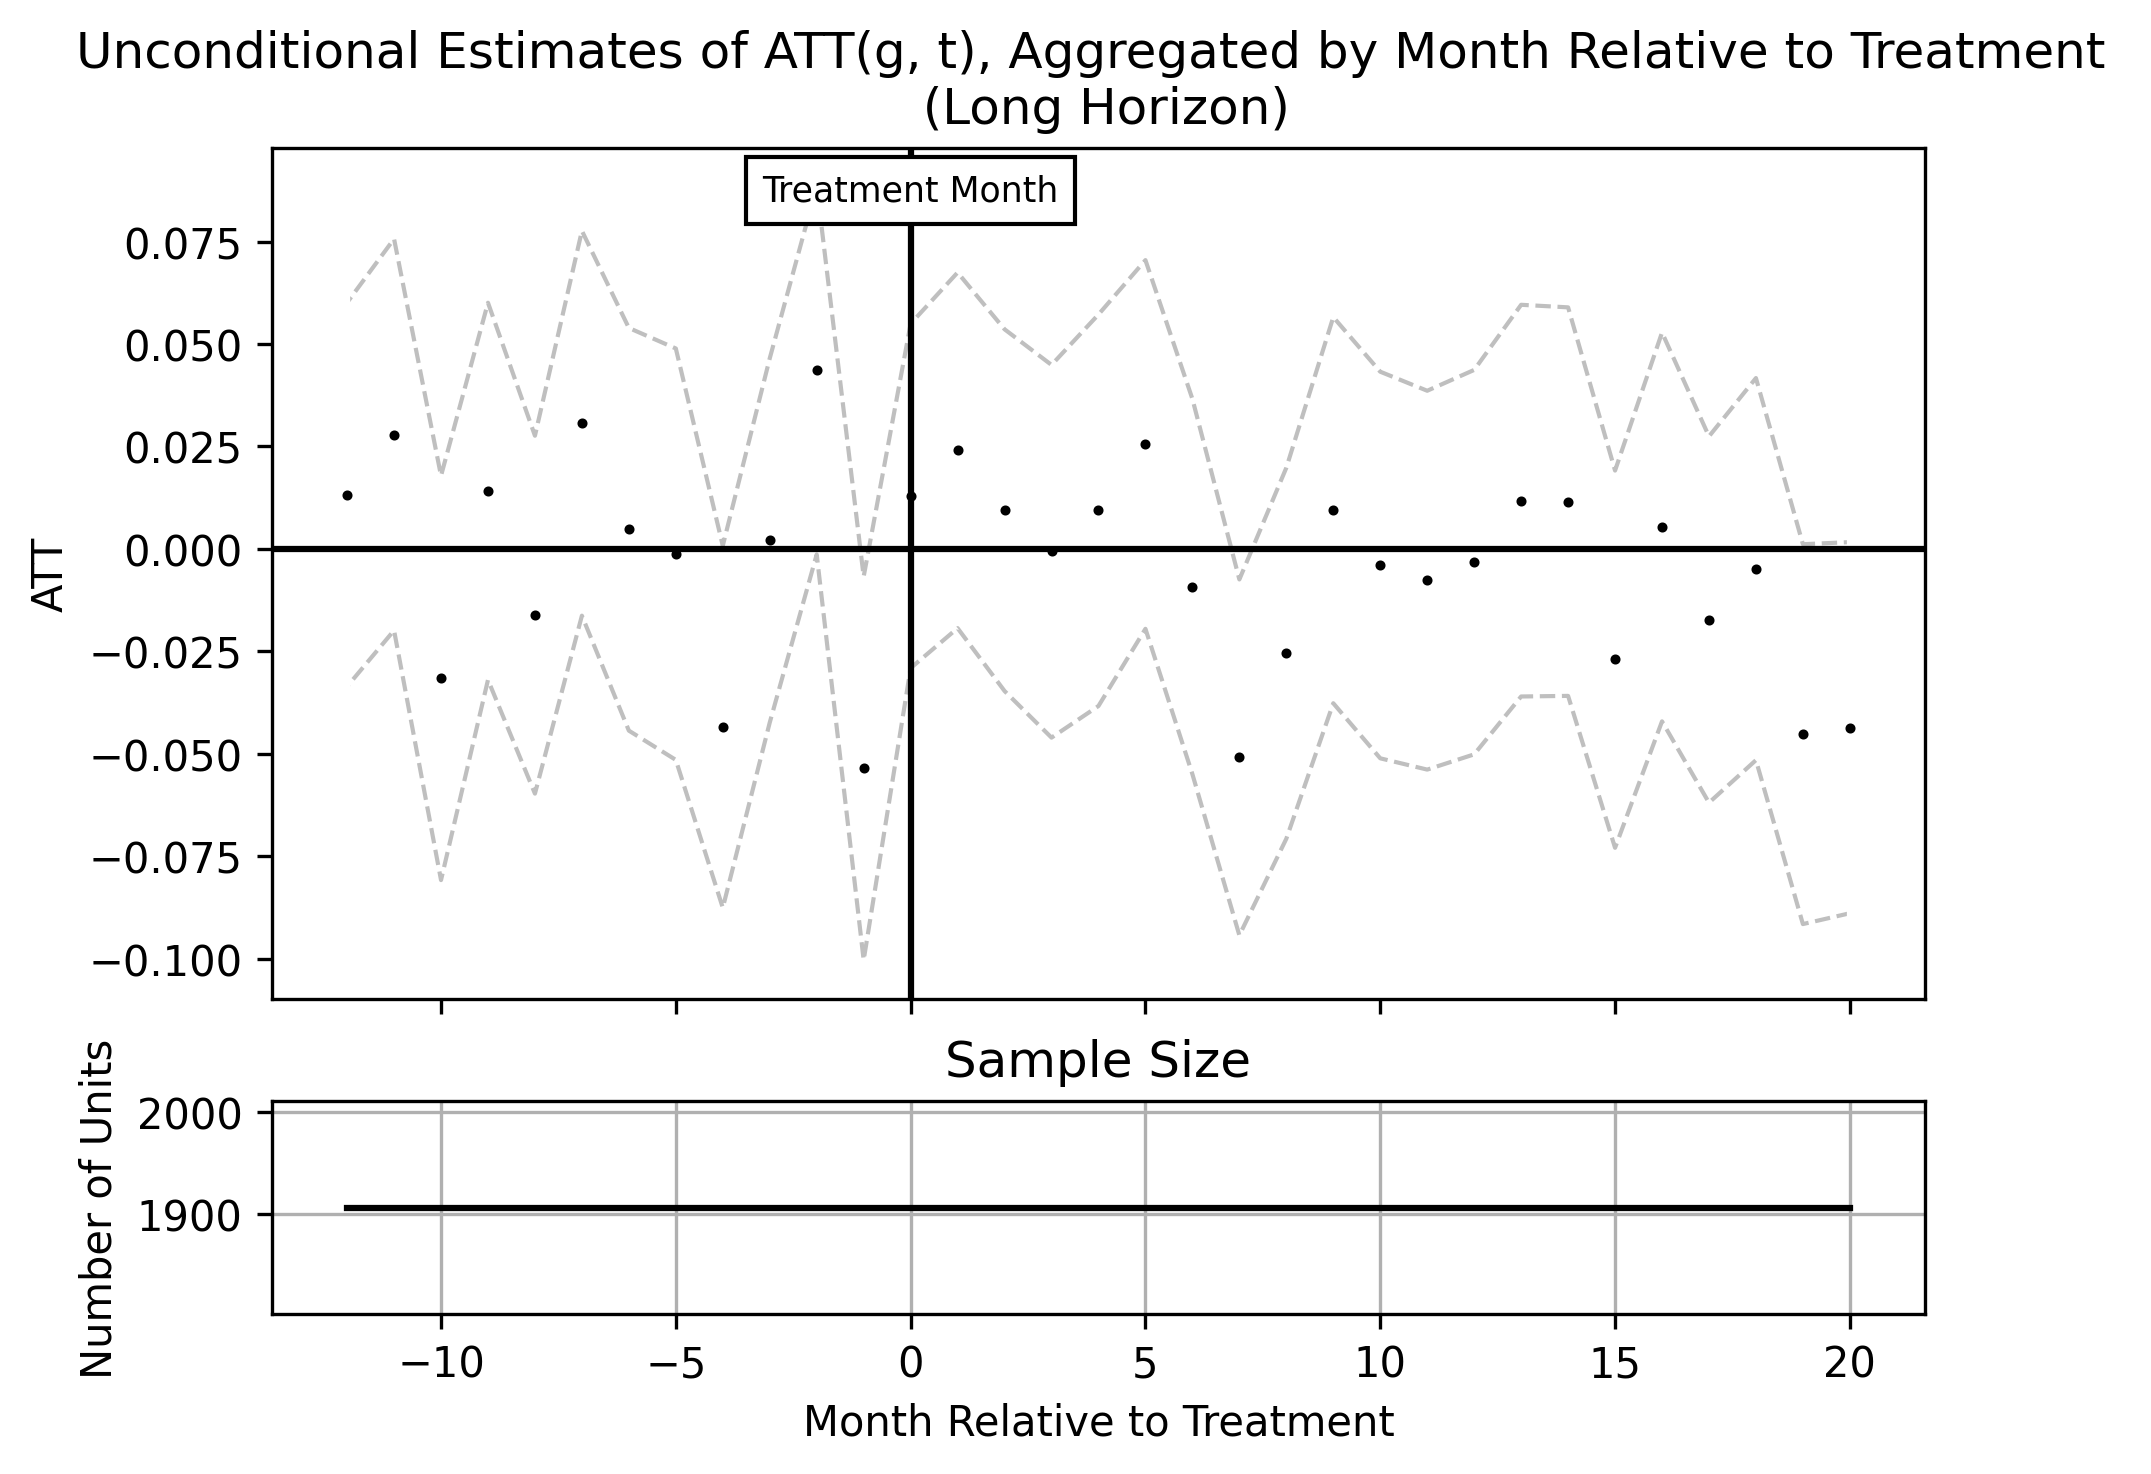

In [7]:
# Plot unconditional ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_unconditional_event_study_long_horizon.png",
                                 start_period=-12, end_period=20,
                                 title="Unconditional Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

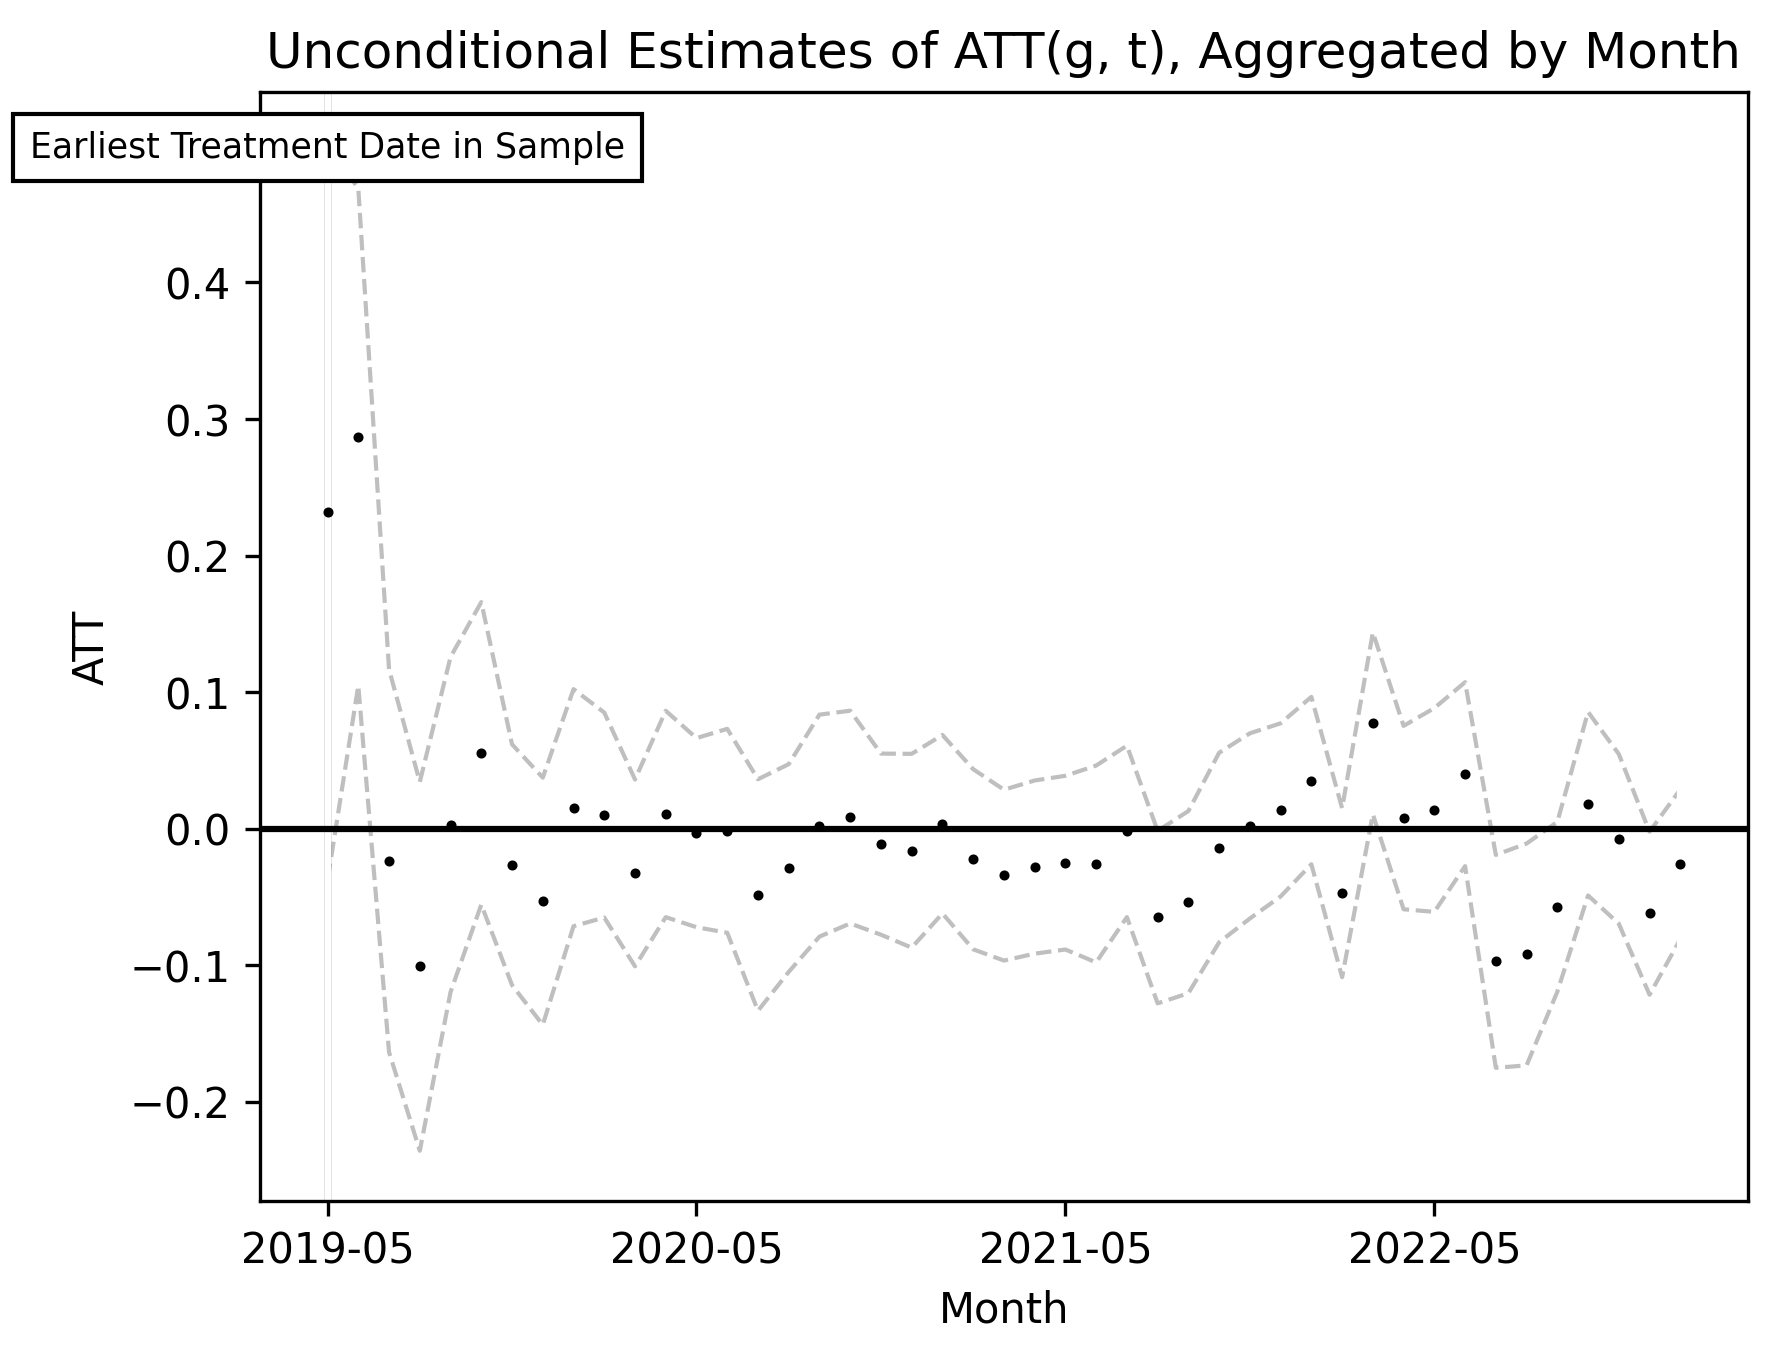

In [8]:
# Plot unconditional ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_unconditional_time.png",
                           title="Unconditional Estimates of ATT(g, t), Aggregated by Month")

In [9]:
# Run DiD conditional on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
formula = f'{analysis} ~ ' + '+'.join(pre_treatment_covariates)
result = att_gt.fit(formula=formula, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]   62%|████████████▍       | 1362/2184 [00:26<00:16, 50.62it/s]/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/differences/did/att_if.py:33: RuntimeWarning: invalid value encountered in scalar divide
  eta_cont = np.mean(dr_att_cont) / np.mean(w_cont)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.

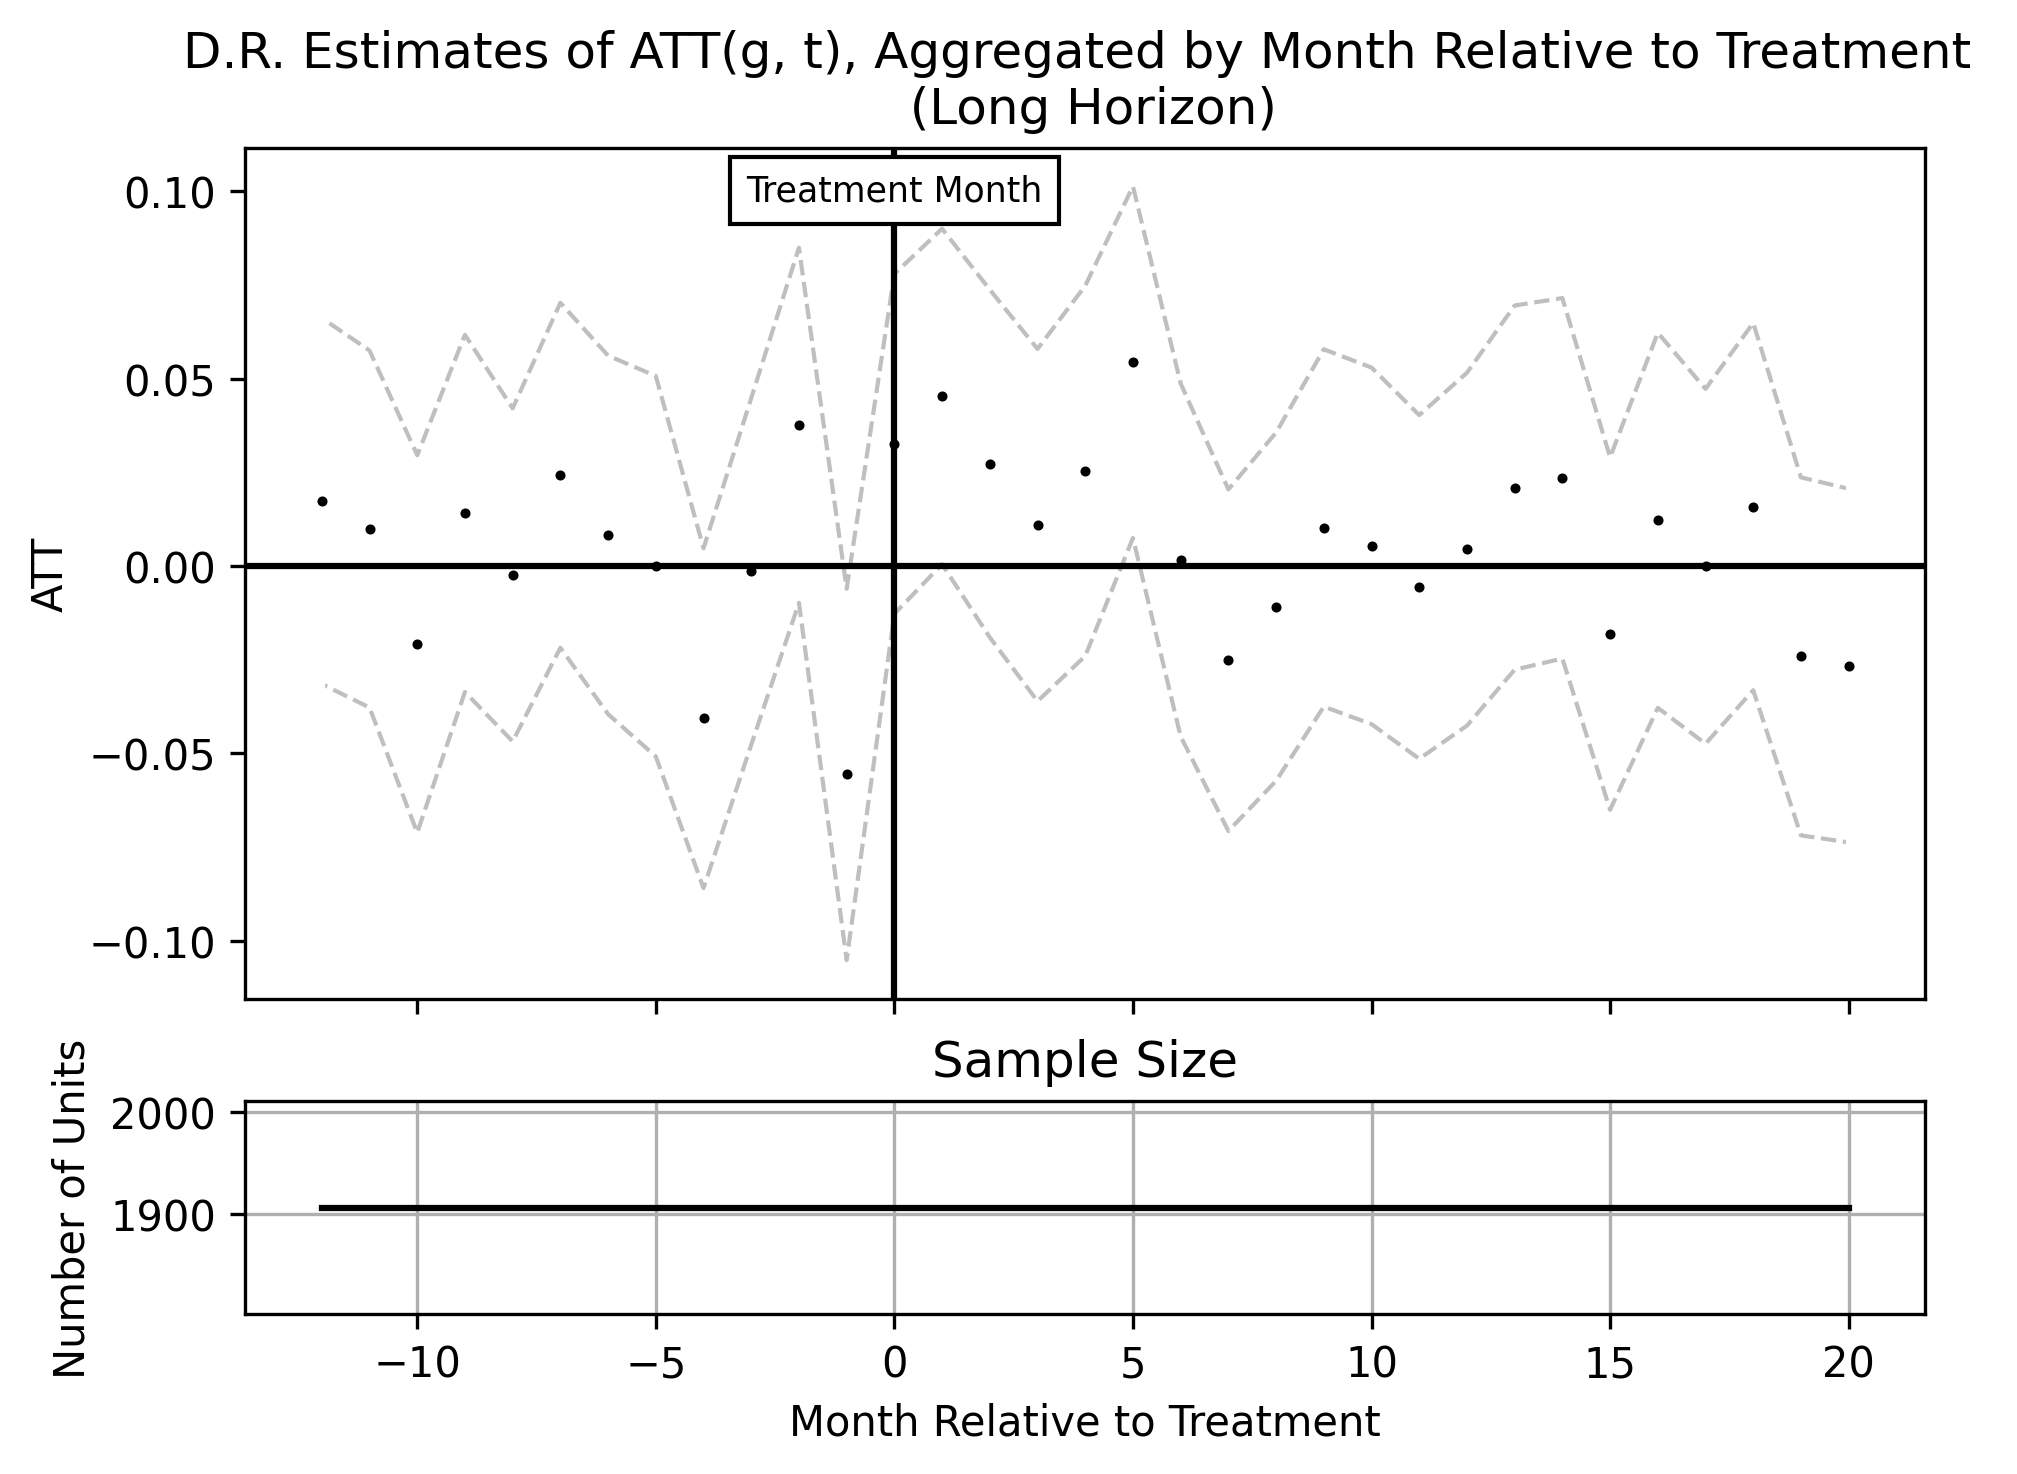

In [13]:
# Plot D.R. ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_dr_event_study_long_horizon.png", start_period=-12,
                                 end_period=20,
                                 title="D.R. Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

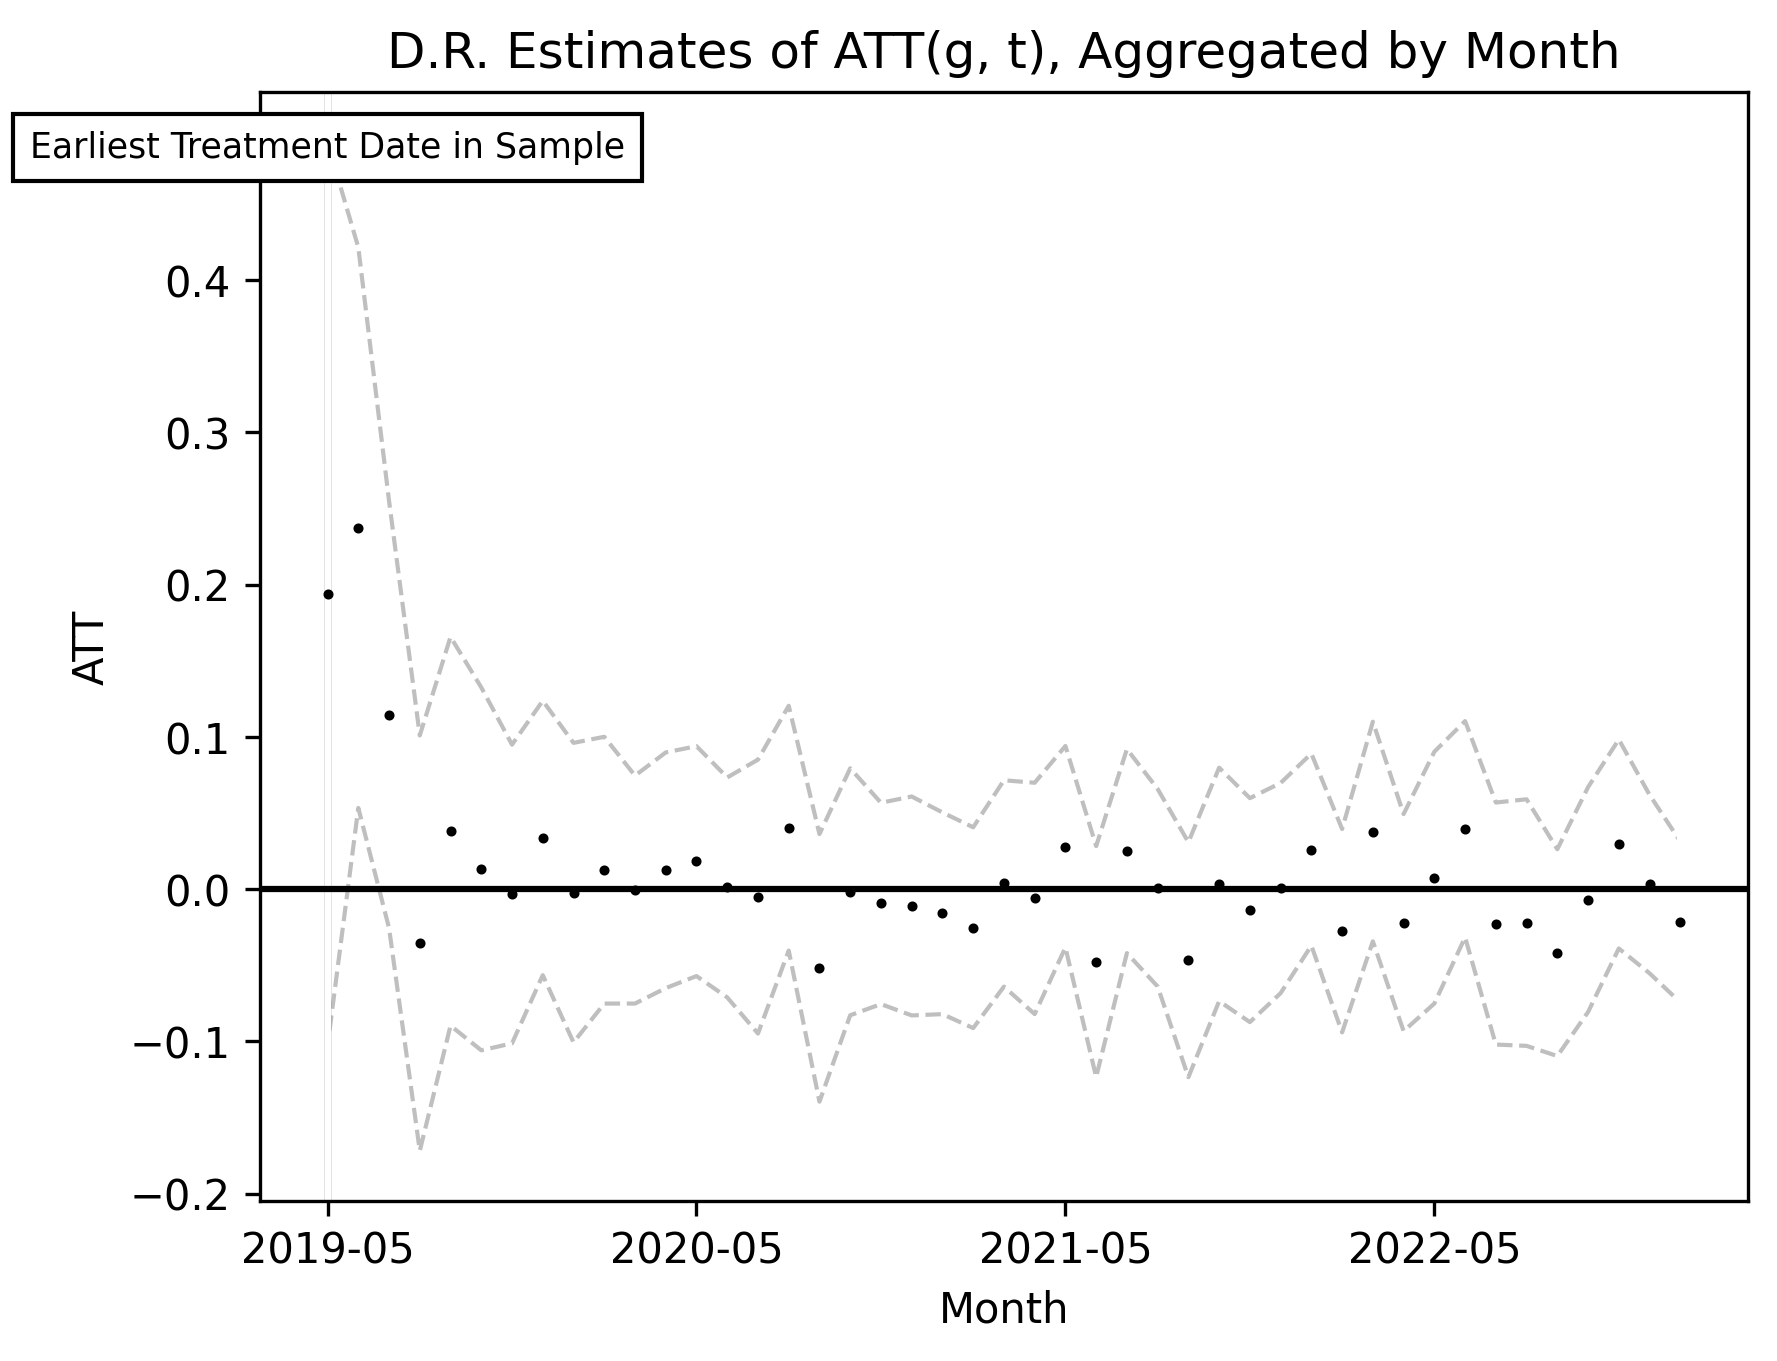

In [11]:
# Plot D.R. ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_dr_time.png",
                           title="D.R. Estimates of ATT(g, t), Aggregated by Month")